## LSTM

In [ ]:
# 필요한 모듈 임포트
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LSTM

In [ ]:
# time step만큼 시퀀스 분리
def split_sequence(sequence, step):
  x, y = list(), list()
  for i in range(len(sequence)):
    end_idx = i + step
    if end_idx > len(sequence) - 1:
      break
    seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
    x.append(seq_x)
    y.append(seq_y)
  
  return np.array(x), np.array(y)

In [ ]:
# sin 함수 학습 데이터
x = [i for i in np.arange(start=-10, stop=10, step=0.1)]
train_y = [np.sin(i) for i in x]

[0.5440211108893698, 0.45753589377532133, 0.3664791292519284, 0.2717606264109442, 0.1743267812229814, 0.07515112046181108, -0.02477542545335599, -0.12445442350705994, -0.2228899141002442, -0.31909836234934874, -0.4121184852417533, -0.5010208564578816, -0.5849171928917588, -0.6629692300821793, -0.7343970978741098, -0.798487112623487, -0.8545989080882778, -0.9021718337562911, -0.9407305566797707, -0.9698898108450846, -0.9893582466233808, -0.9989413418397717, -0.9985433453746054, -0.9881682338770016, -0.9679196720314885, -0.9379999767747419, -0.8987080958116308, -0.8504366206285696, -0.7936678638491591, -0.7289690401258831, -0.6569865987187972, -0.5784397643882089, -0.4941133511386182, -0.4048499206166089, -0.3115413635133897, -0.21511998808782767, -0.11654920485050599, -0.016813900484363032, 0.08308940281748313, 0.18216250427208192, 0.2794154981989122, 0.37387666483022286, 0.464602179413744, 0.550685542597625, 0.6312666378723092, 0.7055403255703806, 0.772764487555977, 0.8322674422238919,

모델 학습에 필요한 학습 데이터셋

In [ ]:
# 하이퍼파라미터
n_timesteps = 15
n_feature = 1

In [ ]:
# 시퀀스 나누기
# train_x.shape => (samples, timesteps)
# train_y.shape => (samples)
train_x, train_y = split_sequence(train_y, step=n_timesteps)
print("shape x:{} / y: {}".format(train_x, train_y))

입력 시퀀스 만들기 위해 split_ssequence() 호출하여 n_timesteps만큼 나눠서 입력 시퀀스 생성

In [ ]:
# LSRM 입력 벡터 크기를 맞추기 위해 벡터 차원 크기 변경
# reshape from [samples, timesteps] into [samples, timesteps, features]
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], n_feature)
print("train_x.shape = {}".format(train_x.shape))
print("train_y.shape = {}".format(train_y.shape))

train_x.shape = (185, 15, 1)
train_y.shape = (185,)


LSTM 계층을 사용하기 위하여 3차원 텐서 Tenser 형태여야 한다.<br>
그래서 2차원인 train_x를 3차원 형태로 변환<br>
(samples, time step) -> (batch suze, time step, input length)


In [ ]:
# LSTM 모델 정의
model = Sequential()
model.add(LSTM(units=10,
               return_sequences=False,
               input_shape=(n_timesteps, n_feature)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

LSTM 계층을 정의한 후 모델 생성<br>
LSTM 계층 1개와 출력을 위한 Dense 계층 1개로 구성<br>
손실 함수: mse<br>
옵티마이저: adam

In [ ]:
# 모델 학습
np.random.seed(0)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='loss',
    patience=5,
    mode='auto')
history = model.fit(train_x, train_y, epochs=1000, callbacks=[early_stopping])

Epoch 1/1000
6/6 [==============================] - 2s 7ms/step - loss: 0.5556
Epoch 2/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.4749
Epoch 3/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.4083
Epoch 4/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.3536
Epoch 5/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3057
Epoch 6/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2698
Epoch 7/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2402
Epoch 8/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.2166
Epoch 9/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.1971
Epoch 10/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.1837
Epoch 11/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.1715
Epoch 12/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.1620
Epoch 13/1000
6/6 [==============================

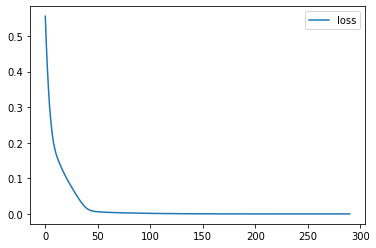

In [ ]:
# loss 그래프 생성
plt.plot(history.history['loss'], label='loss')
plt.legend(loc="upper right")
plt.show()

에포크 증가에 따른 손실 그래프<br>
학습이 진행될수록 손실이 줄어든다.

In [ ]:
# 테스트 데이터셋 생성
test_x = np.arange(10, 20, 0.1)
calc_y = np.cos(test_x) # 테스트 정답 데이터

In [ ]:
# LSTM 모델 예측 및 로그 저장
test_y = calc_y[:n_timesteps]
for i in range(len(test_x) - n_timesteps):
  net_input = test_y[i:i + n_timesteps]
  net_input = net_input.reshape((1, n_timesteps, n_feature))
  train_y = model.predict(net_input, verbose=0)
  print(test_y.shape, i, i + n_timesteps)
  test_y = np.append(test_y, train_y)

(15,) 0 15
(16,) 1 16
(17,) 2 17
(18,) 3 18
(19,) 4 19
(20,) 5 20
(21,) 6 21
(22,) 7 22
(23,) 8 23
(24,) 9 24
(25,) 10 25
(26,) 11 26
(27,) 12 27
(28,) 13 28
(29,) 14 29
(30,) 15 30
(31,) 16 31
(32,) 17 32
(33,) 18 33
(34,) 19 34
(35,) 20 35
(36,) 21 36
(37,) 22 37
(38,) 23 38
(39,) 24 39
(40,) 25 40
(41,) 26 41
(42,) 27 42
(43,) 28 43
(44,) 29 44
(45,) 30 45
(46,) 31 46
(47,) 32 47
(48,) 33 48
(49,) 34 49
(50,) 35 50
(51,) 36 51
(52,) 37 52
(53,) 38 53
(54,) 39 54
(55,) 40 55
(56,) 41 56
(57,) 42 57
(58,) 43 58
(59,) 44 59
(60,) 45 60
(61,) 46 61
(62,) 47 62
(63,) 48 63
(64,) 49 64
(65,) 50 65
(66,) 51 66
(67,) 52 67
(68,) 53 68
(69,) 54 69
(70,) 55 70
(71,) 56 71
(72,) 57 72
(73,) 58 73
(74,) 59 74
(75,) 60 75
(76,) 61 76
(77,) 62 77
(78,) 63 78
(79,) 64 79
(80,) 65 80
(81,) 66 81
(82,) 67 82
(83,) 68 83
(84,) 69 84
(85,) 70 85
(86,) 71 86
(87,) 72 87
(88,) 73 88
(89,) 74 89
(90,) 75 90
(91,) 76 91
(92,) 77 92
(93,) 78 93
(94,) 79 94
(95,) 80 95
(96,) 81 96
(97,) 82 97
(98,) 83 98
(9

LSTM 모델의 예측값을 test_y 리스트에 순치적으러 저장

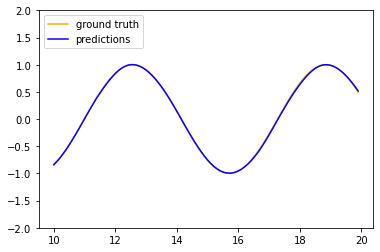

In [ ]:
# 예측 결과 그래프 그리기
plt.plot(test_x, calc_y, label="ground truth", color="orange")
plt.plot(test_x, test_y, label="predictions", color="blue")

plt.legend(loc='upper left')
plt.ylim(-2, 2)
plt.show()

___

## 양방향 LSTM

In [4]:
# 필요한 모듈 임포트
import numpy as np
from random import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, TimeDistributed

In [5]:
# 시퀀스 생성
def get_sequence(n_timesteps):
  # 0-1 사이의 랜덤 시퀀스 생성
  X = np.array([random() for _ in range(n_timesteps)])

  # 클래스 분류 기준
  limit = n_timesteps / 4.0

  # 누적합 시퀀스에서 클래스 결정
  # 누적합 항목이 limit보다 작은 경우 0, 아닌 경우 1로 분류
  y = np.array([0 if x < limit else 1 for x in np.cumsum(X)])

  # LSTM 입력을 위해 3차원 텐서 형태로 변경
  X = X.reshape(1, n_timesteps, 1)
  y = y.reshape(1, n_timesteps, 1)
  return X, y

In [6]:
# 하이퍼파라미터 정의
n_units = 20
n_timesteps = 4

In [8]:
# 양방향 LSTM 모델 정의
model = Sequential()
model.add(Bidirectional(LSTM(n_units, return_sequences=True, input_shape=(n_timesteps, 1))))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

LSTM을 양방향으로 설정하기 위하여 Bidirectional 래퍼wrapper을 사용<br>
정방향 역방향 LSTM 계층을 연결해야 해서 return_sequence인자를 True로 변경<br>
Dense 계층은 TimeDistributed 래퍼를 사용해 3차원 텐서를 입력받도록 확장

In [9]:
# 모델 학습
# 에포크마다 학습 데이터를 생성해서 학습
for epoch in range(1000):
  X, y = get_sequence(n_timesteps)
  model.fit(X, y, epochs=1, batch_size=1, verbose=2)

1/1 - 5s - loss: 0.6831 - accuracy: 0.5000 - 5s/epoch - 5s/step
1/1 - 0s - loss: 0.6678 - accuracy: 0.7500 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6826 - accuracy: 0.5000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6785 - accuracy: 0.5000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6630 - accuracy: 0.7500 - 5ms/epoch - 5ms/step
1/1 - 0s - loss: 0.6926 - accuracy: 0.2500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.6703 - accuracy: 0.7500 - 7ms/epoch - 7ms/step
1/1 - 0s - loss: 0.6742 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.6968 - accuracy: 0.2500 - 9ms/epoch - 9ms/step
1/1 - 0s - loss: 0.6909 - accuracy: 0.5000 - 10ms/epoch - 10ms/step
1/1 - 0s - loss: 0.6649 - accuracy: 0.7500 - 21ms/epoch - 21ms/step
1/1 - 0s - loss: 0.6757 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
1/1 - 0s - loss: 0.6581 - accuracy: 1.0000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6649 - accuracy: 0.7500 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6622 - accuracy: 0.7500 - 4ms/epoch - 4ms/step
1/1 - 0s

배치 사이즈를 1로 설정해서 에포크 횟수만큼 여러 번 호출

In [15]:
# 모델 평가
X, y = get_sequence(n_timesteps)
y_prob = model.predict(X , verbose=0) 
yhat = y_prob.argmax(axis=-1)
for i in range(n_timesteps):
  print('실젯값: ', y[0, i], '예측값: ', yhat[0, i])

실젯값:  [0] 예측값:  0
실젯값:  [0] 예측값:  0
실젯값:  [1] 예측값:  0
실젯값:  [1] 예측값:  0
